In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
dataFiles = ["$HOME/fjpythia/output/821.root"]
a = getData(dataFiles)


Processed $HOME/fjpythia/output/821.root in 104.0 seconds


In [15]:
b = applyCut(a, 'pt_jet > 0.25', 'pt_jet > 0.25')

pt_jet > 0.25 42848138  fraction kept: 81.6


In [18]:
print a

          pt_photon         Q2  eta_electron     evid  pt_electron  \
0          3.700133  15.330631     -2.267397        0     3.700133   
1          3.700133  15.330631     -2.267397        0     3.700133   
2          3.700133  15.330631     -2.267397        0     3.700133   
3          3.700133  15.330631     -2.267397        0     3.700133   
4          3.748714  14.286182     -2.351012        1     3.748714   
5          3.748714  14.286182     -2.351012        1     3.748714   
6          3.748714  14.286182     -2.351012        1     3.748714   
7          2.140949   5.350154     -2.773004        2     2.140949   
8          2.140949   5.350154     -2.773004        2     2.140949   
9          2.140949   5.350154     -2.773004        2     2.140949   
10         2.140949   5.350154     -2.773004        2     2.140949   
11         2.140949   5.350154     -2.773004        2     2.140949   
12         2.140949   5.350154     -2.773004        2     2.140949   
13         2.140949 

In [16]:
print b

          pt_photon         Q2  eta_electron     evid  pt_electron  \
1          3.700133  15.330631     -2.267397        0     3.700133   
2          3.700133  15.330631     -2.267397        0     3.700133   
3          3.700133  15.330631     -2.267397        0     3.700133   
5          3.748714  14.286182     -2.351012        1     3.748714   
6          3.748714  14.286182     -2.351012        1     3.748714   
8          2.140949   5.350154     -2.773004        2     2.140949   
9          2.140949   5.350154     -2.773004        2     2.140949   
10         2.140949   5.350154     -2.773004        2     2.140949   
11         2.140949   5.350154     -2.773004        2     2.140949   
12         2.140949   5.350154     -2.773004        2     2.140949   
13         2.140949   5.350154     -2.773004        2     2.140949   
14         2.140949   5.350154     -2.773004        2     2.140949   
16         2.796645  13.718385     -2.098563        3     2.796645   
17         2.796645 

In [11]:
print min(a['Q2']), min(a['pt_jet'])

4.30186891556 2.50092313081e-07


(array([4.6574304e+07, 5.0281830e+06, 6.9612400e+05, 1.6716300e+05,
        4.9528000e+04, 1.6911000e+04, 5.5260000e+03, 1.6970000e+03,
        4.5900000e+02, 1.1600000e+02]),
 array([ 0.9868654,  4.7016892,  8.416513 , 12.131337 , 15.846161 ,
        19.560986 , 23.275808 , 26.990633 , 30.705458 , 34.42028  ,
        38.135105 ], dtype=float32),
 <a list of 10 Patch objects>)

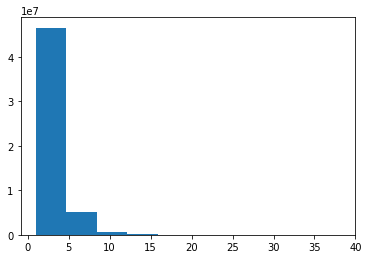

In [10]:
plt.hist(a['pt_electron'])

In [12]:
#d = applyCut(a, 'pt_electron > 4', 'pt_electron > 4')
d = applyCut(a, 'pt_jet > 4', 'pt_jet > 4')
#d = applyCut(a, 'y > 0.01 and y < 0.85', '0.01 < y < 0.85')
#d = applyCut(d, '0.05 < x < 0.1', '0.05 < x < 0.1')
#d = applyCut(a, '10 < pt_electron < 15', '10 < pt_electron < 15')

#d = getDelta(d, 'electron')
#d = getDelta(d, 'quark')
#d = fixPhi(d, 'photon')
#d.eval('pt_ratio = pt_jet/pt_electron', inplace = True)

pt_jet > 4 3206861  fraction kept: 6.1


In [8]:
d1 = applyCut(d, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')

delta_phi_photon_abs < 0.4 26201  fraction kept: 90.6


In [30]:
def plotRatio1dnvar(txt):
    fig = plt.figure(figsize = (10,8))
    plot1dnvar([d, d1], ['pt_ratio']*2,\
               ['$p_T^{jet} > 4 GeV$',\
                '$p_T^{jet} > 4 GeV$ \n $|\Delta \phi|< 0.4$'],\
               0, 2, 0, 7e6, 0.05, '$p_T^{jet}/p_T^{electron}$', 'linear', txt)

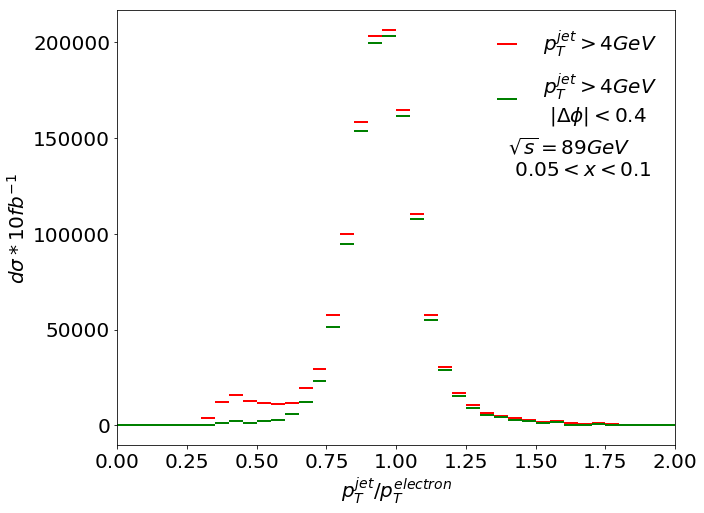

In [32]:
fig = plotRatio1dnvar('pt_ratio')
plt.text(1.4,130000,'$\sqrt{s}=89 GeV$ \n $0.05 < x < 0.1$', fontsize = 20)
plt.savefig('images/pt_ratio.pdf', bbox_inches='tight')

In [5]:
print min(a['pt_electron'])

0.986865401268


In [3]:
b = applyCut(a, 'Q2 > 25', 'Q2 > 25')
b = applyCut(b, 'y > 0.01 and y < 0.85', '0.01 < y < 0.85')
b = fixPhi(b, 'photon')
b = applyCut(b, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')
b1 = keepOneJet(b)

Q2 > 25 7273790  fraction kept: 13.8
0.01 < y < 0.85 6953436  fraction kept: 95.6
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 1714269  fraction kept: 24.7

Remove extra jets 1233816  fraction kept: 72.0


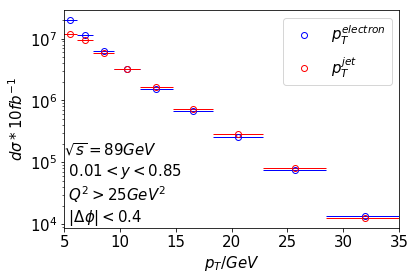

In [4]:
xvar_array = toArrayFloat(0.69, 1.55, 0, log=True, logNum=10)
xsec = np.mean(a['xsec'])
ntrials = a['ntrials'][a.shape[0]-1]
    
x1, y1, xerr = getHist(b1, 'pt_electron', xvar_array)
x2, y2, xerr = getHist(b, 'pt_jet', xvar_array)

plt.errorbar(x1, 10*y1*xsec*1e12/ntrials, xerr = xerr, fmt='none', color='b', elinewidth=1)
plt.plot(x1, 10*y1*xsec*1e12/ntrials, 'bo', fillstyle='none', label='$p_T^{electron}$')
plt.errorbar(x2, 10*y2*xsec*1e12/ntrials, xerr=xerr, fmt='none', color='r', elinewidth=1)
plt.plot(x2, 10*y2*xsec*1e12/ntrials, 'ro', fillstyle='none', label='$p_T^{jet}$')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlabel('$p_T/GeV$', fontsize=15)
plt.ylabel('$d\sigma*10fb^{-1}$', fontsize=15)
plt.xlim(left=5, right=35)
plt.legend(prop={'size': 15}, frameon=True, loc='best')
plt.text(5,1e4,'$\sqrt{s} = 89 GeV$ \n $0.01 < y < 0.85$ \n $Q^2 > 25 GeV^2$ \n $|\Delta\phi|<0.4$',\
        fontsize=15)
plt.savefig('images/pt_electron_jet.pdf', bbox_inches='tight')

In [13]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('pt_jet')
    scalar.append('pt_jet_g')
    scalar.append('phi_jet')
    scalar.append('pt_quark')
    scalar.append('eta_quark')
    scalar.append('phi_quark')
    scalar.append('pt_photon')
    scalar.append('phi_photon')
    scalar.append('pt_electron')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [14]:
files = ["$HOME/fjpythia/output/925.root"]
a = getData(files)


Processed $HOME/fjpythia/output/925.root in 116.6 seconds


In [15]:
d = applyCut(a, 'pt_electron > 4', 'pt_electron > 4')
d = applyCut(d, '0.01 < y < 0.85', '0.01 < y < 0.85')
d = fixPhi(d, 'photon')

pt_electron > 4 1926302  fraction kept: 4.4
0.01 < y < 0.85 1841645  fraction kept: 95.6
Fixed photon phi range
Fixed photon delta phi range


In [19]:
d = applyCut(d, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')
d = applyCut(d, 'pt_jet > 4', 'pt_jet > 4')
d.eval('pt_ratio = pt_jet / pt_electron', inplace=True)
d.eval('pt_ratio_g = pt_jet_g / pt_electron', inplace=True)
d1 = applyCut(d, '5 < pt_electron < 10', '5 < pt_electron < 10')
d2 = applyCut(d, '10 < pt_electron < 15', '10 < pt_electron < 15')
d3 = applyCut(d, '20 < pt_electron < 30', '20 < pt_electron < 30')

delta_phi_photon_abs < 0.4 452115  fraction kept: 100.0
pt_jet > 4 233933  fraction kept: 51.7
5 < pt_electron < 10 143296  fraction kept: 61.3
10 < pt_electron < 15 17233  fraction kept: 7.4
20 < pt_electron < 30 950  fraction kept: 0.4


In [30]:
def plot_ratio(df, var_array, label_array, color_array):
    for i in range(0,len(var_array)):
        fig = plt.hist(df[var_array[i]], label=label_array[i], range=(0,2.0), bins=40, histtype='step', fill=True, stacked=True, normed=True, alpha=0.5, color=color_array[i], linewidth=2)
    return fig

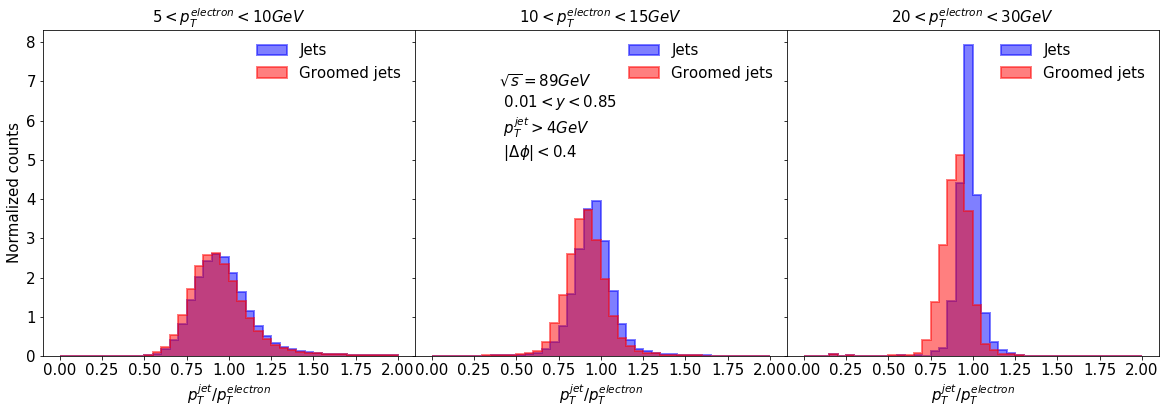

In [32]:
fig = plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0, hspace=0)

ax1 = plt.subplot(131)
plot_ratio(d1, ['pt_ratio', 'pt_ratio_g'], ['Jets', 'Groomed jets'], ['b', 'r'])
plt.xlabel('$p_T^{jet}/p_T^{electron}$', fontsize=15)
plt.ylabel('Normalized counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.title('$5 < p_T^{electron} < 10 GeV$', fontsize=15)

ax2 = plt.subplot(132, sharey=ax1)
plot_ratio(d2, ['pt_ratio', 'pt_ratio_g'], ['Jets', 'Groomed jets'], ['b', 'r'])
plt.xlabel('$p_T^{jet}/p_T^{electron}$', fontsize=15)
plt.xticks(fontsize=15)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.text(0.4, 5, '$\sqrt{s} = 89 GeV$ \n $0.01 < y < 0.85$ \n $p_T^{jet} > 4 GeV$ \n $|\Delta \phi| < 0.4$', fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.title('$10 < p_T^{electron} < 15 GeV$', fontsize=15)

ax3 = plt.subplot(133, sharey=ax1)
plot_ratio(d3, ['pt_ratio', 'pt_ratio_g'], ['Jets', 'Groomed jets'], ['b', 'r'])
plt.xlabel('$p_T^{jet}/p_T^{electron}$', fontsize=15)
plt.xticks(fontsize=15)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.title('$20 < p_T^{electron} < 30 GeV$', fontsize=15)

plt.savefig('images/pt_ratio_2.pdf', bbox_inches='tight')